In [1]:
import copy
import os
import pathlib
import time
from typing import Mapping
import itertools

In [2]:
import numpy as np
from scipy import stats
import pandas as pd
import seaborn as sns
import tensorflow as tf
from matplotlib import pyplot as plt

In [3]:
from drmdp import dataproc

In [4]:
import warnings

In [5]:
warnings.filterwarnings('ignore')

In [6]:
files = tf.io.gfile.glob(f"{pathlib.Path.home()}/fs/drmdp/workflows/controljob/agg/1762657758/1762661657/metrics/*.parquet")

In [7]:
df_metrics = dataproc.read_data(files, reader="pd")

In [8]:
df_metrics.iloc[0]["meta"]["env_spec"]

{'args': {'constraint_violation_reward': 0.0,
  'emit_state': False,
  'max_episode_steps': 200,
  'penalty_gamma': 1.0,
  'reward_fn': 'pos-enf'},
 'feats_spec': {'args': None, 'name': 'scale'},
 'name': 'Finite-SC-ShuntDc-v0'}

In [9]:
df_metrics

,episode,exp_id,meta,returns,steps,metrics,method
1,970,1762657758-01d6cd78-Finite-SC-ShuntDc-v0,"{'context': {'dummy': 0}, 'exp_id': '176265775...","[118.16041560897803, 143.71843063334885, 135.0...","[8, 200, 200, 200, 200, 200, 200, 13, 200, 200...","{'returns': {'mean': 198.17493603281486, 'std'...",L-TDD[B]
3,970,1762657758-0370b55e-Finite-CC-PermExDc-v0,"{'context': {'dummy': 0}, 'exp_id': '176265775...","[259.25682146850914, 367.4612810322214, 184.95...","[200, 200, 131, 200, 16, 200, 200, 200, 200, 2...","{'returns': {'mean': 289.1105609206313, 'std':...",DMR
4,970,1762657758-04ecde51-Finite-SC-PermExDc-v0,"{'context': {'dummy': 0}, 'exp_id': '176265775...","[224.4714986741585, 224.04583454146083, 225.93...","[126, 35, 200, 60, 157, 200, 11, 74, 200, 134,...","{'returns': {'mean': 222.13877462455582, 'std'...",IMR
5,970,1762657758-066d8913-Finite-TC-ShuntDc-v0,"{'context': {'dummy': 0}, 'exp_id': '176265775...","[341.2621642656161, 337.7658842043623, 338.626...","[200, 200, 8, 200, 200, 200, 200, 200, 200, 20...","{'returns': {'mean': 242.7854323164925, 'std':...",L-TDD[B]
6,970,1762657758-06c10883-Finite-SC-ShuntDc-v0,"{'context': {'dummy': 0}, 'exp_id': '176265775...","[184.69451015892088, 281.75159980636465, 283.1...","[200, 200, 76, 200, 200, 9, 200, 200, 200, 200...","{'returns': {'mean': 220.06277518806917, 'std'...",IMR
...,...,...,...,...,...,...,...
245,140,1762657758-fa602890-Finite-SC-PermExDc-v0,"{'context': {'dummy': 0}, 'exp_id': '176265775...","[165.89181794454763, 223.66613176872346, 223.9...","[7, 28, 11, 200, 42, 200, 9, 7, 17, 200, 200, ...","{'returns': {'mean': 205.08457654084037, 'std'...",L-TDD[B]
248,140,1762657758-fc4346e6-Finite-SC-ShuntDc-v0,"{'context': {'dummy': 0}, 'exp_id': '176265775...","[309.80407567262176, 321.80453200060964, 320.6...","[200, 200, 200, 9, 10, 200, 200, 8, 200, 200, ...","{'returns': {'mean': 176.50512344824205, 'std'...",L-TDD[B]
249,140,1762657758-fdf57b2d-Finite-CC-PermExDc-v0,"{'context': {'dummy': 0}, 'exp_id': '176265775...","[49.18929038196695, 256.46113567497395, 54.971...","[35, 106, 35, 200, 40, 27, 27, 200, 13, 28, 19...","{'returns': {'mean': 141.16092701240328, 'std'...",DMR
250,140,1762657758-fe2afc3c-Finite-TC-PermExDc-v0,"{'context': {'dummy': 0}, 'exp_id': '176265775...","[228.2304607806074, 362.162338278834, 365.6786...","[200, 200, 200, 200, 200, 200, 200, 200, 200, ...","{'returns': {'mean': 298.92145891431653, 'std'...",L-TDD[B]


In [10]:
envs = dataproc.get_distinct_envs(df_metrics)

In [11]:
for env_name, spec in sorted(envs.items()):
    print(env_name, spec)

Finite-CC-PermExDc-v0 {'constraint_violation_reward': 0.0, 'emit_state': False, 'max_episode_steps': 200, 'penalty_gamma': 1.0, 'reward_fn': 'pos-enf'}
Finite-CC-ShuntDc-v0 {'constraint_violation_reward': 0.0, 'emit_state': False, 'max_episode_steps': 200, 'penalty_gamma': 1.0, 'reward_fn': 'pos-enf'}
Finite-SC-PermExDc-v0 {'constraint_violation_reward': 0.0, 'emit_state': False, 'max_episode_steps': 200, 'penalty_gamma': 1.0, 'reward_fn': 'pos-enf'}
Finite-SC-ShuntDc-v0 {'constraint_violation_reward': 0.0, 'emit_state': False, 'max_episode_steps': 200, 'penalty_gamma': 1.0, 'reward_fn': 'pos-enf'}
Finite-TC-PermExDc-v0 {'constraint_violation_reward': 0.0, 'emit_state': False, 'max_episode_steps': 200, 'penalty_gamma': 1.0, 'reward_fn': 'pos-enf'}
Finite-TC-ShuntDc-v0 {'constraint_violation_reward': 0.0, 'emit_state': False, 'max_episode_steps': 200, 'penalty_gamma': 1.0, 'reward_fn': 'pos-enf'}


In [12]:
def parse_delay_config(df_input: pd.DataFrame):
    df = copy.deepcopy(df_input)
    def parse_mu(delay_config):
        if delay_config is None:
            return None
        args = delay_config["args"]
        try:
            return args["delay"]
        except KeyError:
            return args["lam"]
        except KeyError as exc:
            raise ValueError(f"Unknown delay config {args}") from exc
    df["delay_type"] = df["delay_config"].apply(lambda dc: dc["name"] if dc else None)
    df["delay_mu"] = df["delay_config"].apply(parse_mu)
    del df["delay_config"]
    return df

## Return Curvers

In [13]:
def create_returns_plotting_data(
    df_data: pd.DataFrame,
):
    df_result = copy.deepcopy(df_data)
    for key in ("delay_config", "gamma",):
        df_result[key] = df_result["meta"].apply(lambda meta: meta["problem_spec"][key])

    specs = {
        "env": df_result["meta"].apply(lambda meta: meta["env_spec"]),
        "feats": df_result["meta"].apply(lambda meta: meta["env_spec"]["feats_spec"])
    }

    for prefix, col_fam in specs.items():
        for col in ("name", "args"):
            df_result[f"{prefix}_{col}"] = col_fam.apply(lambda spec: spec[col])                                       

    del df_result["meta"]
    del df_result["steps"]
    del df_result["metrics"]

    df_result = parse_delay_config(df_result)
    df_baseline = df_result[pd.isnull(df_result["delay_type"])]
    df_result = df_result[~pd.isnull(df_result["delay_type"])]
    baseline_dfs = []
    distinct_algo_configs = df_result[["delay_type", "delay_mu"]].drop_duplicates()

    # Replicate baseline results for each config
    # to make plotting easier.
    for row in distinct_algo_configs.to_dict("records"):
        print(row)
        df_baseline_rp = copy.deepcopy(df_baseline)
        # reward period is one
        df_baseline_rp["delay_type"] = row["delay_type"]
        df_baseline_rp["delay_mu"] = row["delay_mu"]
        baseline_dfs.append(df_baseline_rp)
    df_result = pd.concat(baseline_dfs + [df_result], axis=0)
    df_result = df_result.sort_values(["method", "delay_type", "delay_mu"])
    
    # agg returns
    return {"sarsa": df_result}

In [14]:
df_returns_curves = create_returns_plotting_data(df_metrics)

{'delay_type': 'clipped-poisson', 'delay_mu': 8.0}
{'delay_type': 'clipped-poisson', 'delay_mu': 6.0}
{'delay_type': 'clipped-poisson', 'delay_mu': 2.0}
{'delay_type': 'clipped-poisson', 'delay_mu': 4.0}


In [15]:
df_returns_curves["sarsa"]

,episode,exp_id,returns,method,gamma,env_name,env_args,feats_name,feats_args,delay_type,delay_mu
31,970,1762657758-203c7e06-Finite-CC-ShuntDc-v0,"[373.7925551038518, 374.6322230701511, 351.932...",DMR,0.99,Finite-CC-ShuntDc-v0,"{'constraint_violation_reward': 0.0, 'emit_sta...",tiles,{'tiling_dim': 3.0},clipped-poisson,2.0
36,970,1762657758-2317570b-Finite-CC-ShuntDc-v0,"[374.47363342627807, 290.82024343216335, 375.1...",DMR,1.00,Finite-CC-ShuntDc-v0,"{'constraint_violation_reward': 0.0, 'emit_sta...",tiles,{'tiling_dim': 3.0},clipped-poisson,2.0
45,970,1762657758-24ce3786-Finite-TC-PermExDc-v0,"[315.73056019071856, 344.8264952358663, 318.84...",DMR,1.00,Finite-TC-PermExDc-v0,"{'constraint_violation_reward': 0.0, 'emit_sta...",tiles,{'tiling_dim': 3.0},clipped-poisson,2.0
70,970,1762657758-4a272a31-Finite-SC-ShuntDc-v0,"[14.10137973239799, 14.163075291264448, 14.389...",DMR,0.99,Finite-SC-ShuntDc-v0,"{'constraint_violation_reward': 0.0, 'emit_sta...",scale,None,clipped-poisson,2.0
78,970,1762657758-4e3ba3e7-Finite-TC-ShuntDc-v0,"[332.44708902864767, 342.43917173762657, 338.2...",DMR,0.99,Finite-TC-ShuntDc-v0,"{'constraint_violation_reward': 0.0, 'emit_sta...",scale,None,clipped-poisson,2.0
...,...,...,...,...,...,...,...,...,...,...,...
86,140,1762657758-561c3f87-Finite-TC-PermExDc-v0,"[122.51700234246651, 132.0251441798991, 159.05...",OP-A,0.99,Finite-TC-PermExDc-v0,"{'constraint_violation_reward': 0.0, 'emit_sta...",tiles,{'tiling_dim': 3.0},clipped-poisson,4.0
117,140,1762657758-72238ff1-Finite-SC-PermExDc-v0,"[147.37471267585502, 171.62224663346606, 161.0...",OP-A,1.00,Finite-SC-PermExDc-v0,"{'constraint_violation_reward': 0.0, 'emit_sta...",spliced-tiles,{'tiling_dim': 3.0},clipped-poisson,4.0
181,140,1762657758-bc059e5c-Finite-TC-PermExDc-v0,"[108.85003391738006, 108.78996897725683, 111.0...",OP-A,1.00,Finite-TC-PermExDc-v0,"{'constraint_violation_reward': 0.0, 'emit_sta...",tiles,{'tiling_dim': 3.0},clipped-poisson,4.0
200,140,1762657758-cbdc8e1a-Finite-SC-PermExDc-v0,"[144.49433260701218, 180.14949909888622, 170.2...",OP-A,0.99,Finite-SC-PermExDc-v0,"{'constraint_violation_reward': 0.0, 'emit_sta...",spliced-tiles,{'tiling_dim': 3.0},clipped-poisson,4.0


In [16]:
df_returns_curves["sarsa"]["method"].unique()

array(['DMR', 'FR', 'IMR', 'L-TDD[B]', 'OP-A'], dtype=object)

In [17]:
def export_figure(
    figure, name: str, format: str = "pdf", dpi=300, transparent: bool = True
):
    # to be able to save, we must plot
    base_dir = os.path.dirname(name)
    if not os.path.exists(base_dir):
        tf.io.gfile.makedirs(base_dir)
    figure.savefig(f"{name}.{format}", dpi=dpi, format=format, transparent=transparent)

In [18]:
MARKERS = ["s", "p", "o", "P", "X", "d"]

In [19]:
DASHES = {
    "FR": (1, 0),
    "DMR": (1, 1),
    "IMR": (1, 2),
    "L-TDD": (2, 1),
    "L-TDD[B]": (2, 2),
    "OP-A": (6, 2),
    "OP-S": (6, 3),
}

In [20]:
METHODS_PALETTES = {
    key: palette for key, palette in zip(
        ["FR", "DMR", "IMR", "L-TDD", "L-TDD[B]", "OP-A", "OP-S"],
        sns.color_palette()
    )
}

In [21]:
sorted(df_returns_curves["sarsa"]["env_name"].unique())

['Finite-CC-PermExDc-v0',
 'Finite-CC-ShuntDc-v0',
 'Finite-SC-PermExDc-v0',
 'Finite-SC-ShuntDc-v0',
 'Finite-TC-PermExDc-v0',
 'Finite-TC-ShuntDc-v0']

In [22]:
SHORT_NAMES = {
    "Finite-CC-PermExDc-v0": "CC-PermExDc",
    "Finite-CC-ShuntDc-v0": "CC-ShuntDc",
    "Finite-SC-PermExDc-v0": "SC-PermExDc",
    "Finite-SC-ShuntDc-v0": "SC-ShuntDc",
    "Finite-TC-PermExDc-v0": "TC-PermExDc",
    "Finite-TC-ShuntDc-v0": "TC-ShuntDc-v0",
    "GridWorld-v0": "GW",
    "IceWorld-v0": "IW",
    "MountainCar-v0": "MC",
    "RedGreen-v0": "RGS",
}

In [23]:
def plot_eval_result(
    env: str,
    gamma: float,
    df_data: pd.DataFrame,
    suffix: str,
    max_episode: int = np.inf,
    max_reward_period: int = 8,
    output_dir: str = "figures/returnplots",
    ylog_scale: bool = True,
    linestyles=DASHES,
    palette=METHODS_PALETTES
    
):
    start = time.time()
    df_data = df_data[suffix]
    filter_mask = (
        (df_data["env_name"] == env) &
        (df_data["gamma"] == gamma) & 
        (df_data["episode"] <= max_episode) &
        (df_data["delay_mu"] <= max_reward_period)
    )
    df_result = copy.deepcopy(df_data[filter_mask])
    def rename_env(env: str):
        try:
            return SHORT_NAMES[env]
        except KeyError:
            return env
                               
    df_result["name"] = df_result["env_name"].apply(rename_env)
    del df_result["exp_id"]
    del df_result["env_args"]
    del df_result["env_name"]
    del df_result["feats_args"]
    del df_result["delay_type"]

    # limit episodes if too many
    # to avoid OOM
    if df_result["episode"].max() > 1_000 - 10:
        mask = df_result["episode"].apply(
            lambda episode: episode % 100 == 0
        )
        df_result = df_result[mask]

    df_result = df_result.explode("returns")

    # split to give flexibility in plotting
    name_prefix = "_".join(
        [str(token) for token in ["rc", env, gamma]]
    )
    end = time.time()
    print(f"Proc: {end-start}s. Plotting...")

    start = time.time()
    # Build one by one

    specs = sorted(df_result["feats_name"].unique())
    delays = sorted(df_result["delay_mu"].unique())
    nrows, ncols = len(specs), len(delays)
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(3*ncols, 3*nrows), sharey=True)

    title_template = ", ".join([f"{rename_env(env)}", "P = {col_name}\nEnc = {row_name}"])
    for (spec, delay), ax in zip(itertools.product(specs, delays), axes.flatten()):
        df_slice = df_result[
            (df_result["feats_name"] == spec) & (df_result["delay_mu"] == delay)
        ]
        
        sns.lineplot(
            data=df_slice, 
            x="episode", 
            y="returns", 
            hue="method", 
            style="method",
            palette=palette,
            dashes=linestyles, 
            style_order=None, 
            estimator='mean', 
            errorbar=('ci', 95), 
            n_boot=1000, 
            legend='auto', 
            ax=ax
        )
        if ylog_scale:
            ax.set_yscale("log")

        ax.set_xlabel("Episode")
        ax.set_ylabel("Log(Average Returns)" if ylog_scale else "Average Returns")
        ax.set_title(", ".join([f"{rename_env(env)}", f"$\lambda$ = {delay} \nEnc = {spec}"]))

    plt.tight_layout()
    plt.show()
    
    
    export_figure(fig, os.path.join(output_dir, f"{name_prefix}_{suffix}"))
    end = time.time()
    print(f"Plotted: {end-start}s.")
    

Proc: 0.018989086151123047s. Plotting...


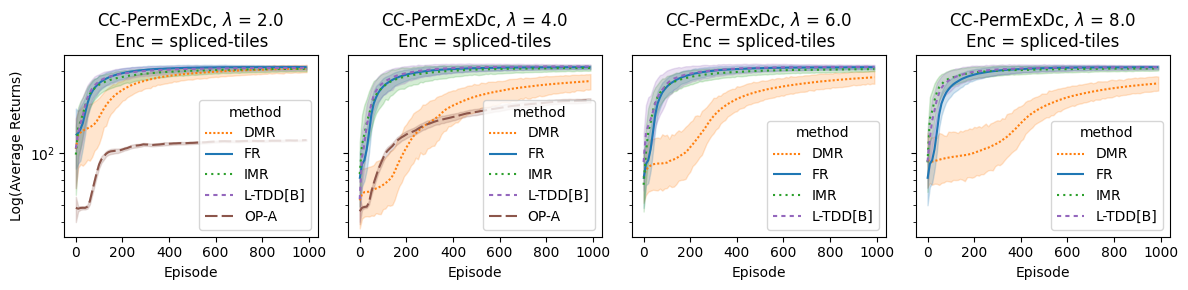

Plotted: 11.071913957595825s.


In [24]:
plot_eval_result(
    env="Finite-CC-PermExDc-v0",
    gamma=1.0,
    df_data=df_returns_curves,
    suffix="sarsa",
)

Proc: 0.02056717872619629s. Plotting...


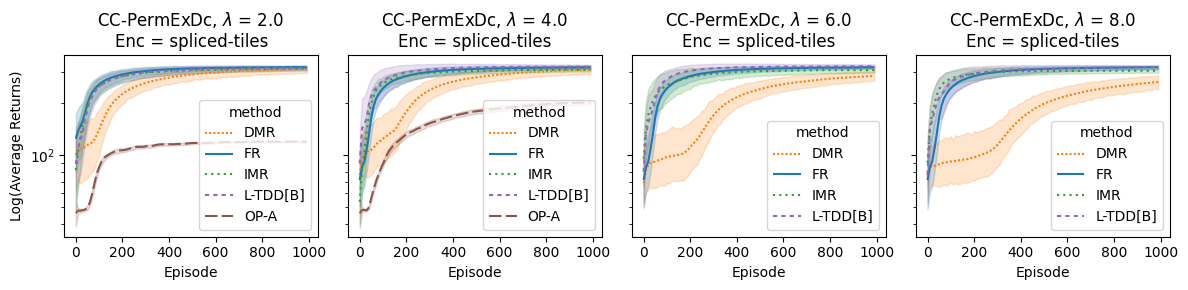

Plotted: 10.55288028717041s.


In [25]:
plot_eval_result(
    env="Finite-CC-PermExDc-v0",
    gamma=0.99,
    df_data=df_returns_curves,
    suffix="sarsa"
)

Proc: 0.013209104537963867s. Plotting...


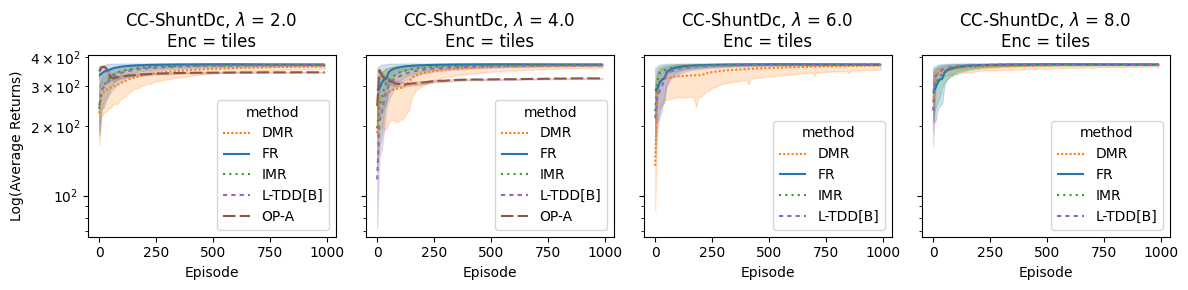

Plotted: 10.603838920593262s.


In [26]:
plot_eval_result(
    env="Finite-CC-ShuntDc-v0",
    gamma=1.0,
    df_data=df_returns_curves,
    suffix="sarsa"
)

Proc: 0.015644073486328125s. Plotting...


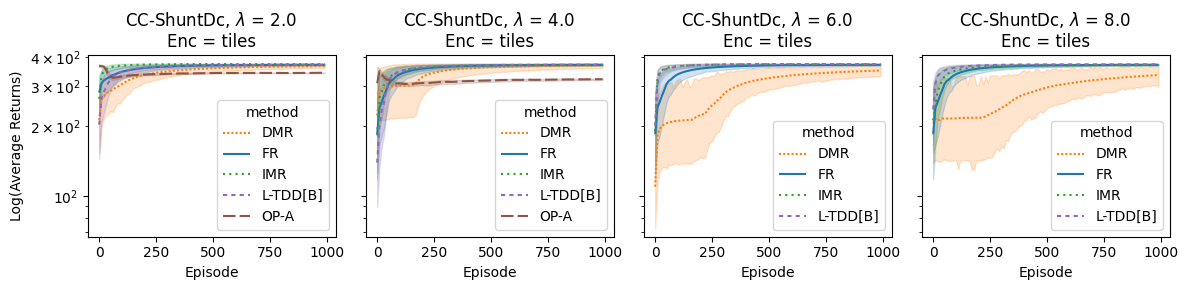

Plotted: 10.803056955337524s.


In [27]:
plot_eval_result(
    env="Finite-CC-ShuntDc-v0",
    gamma=0.99,
    df_data=df_returns_curves,
    suffix="sarsa"
)

Proc: 0.021929025650024414s. Plotting...


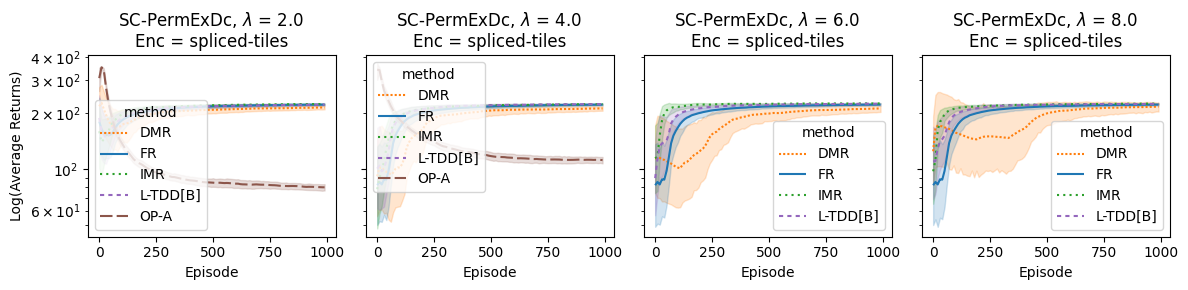

Plotted: 10.911667823791504s.


In [28]:
plot_eval_result(
    env="Finite-SC-PermExDc-v0",
    gamma=1.0,
    df_data=df_returns_curves,
    suffix="sarsa"
)

Proc: 0.015320062637329102s. Plotting...


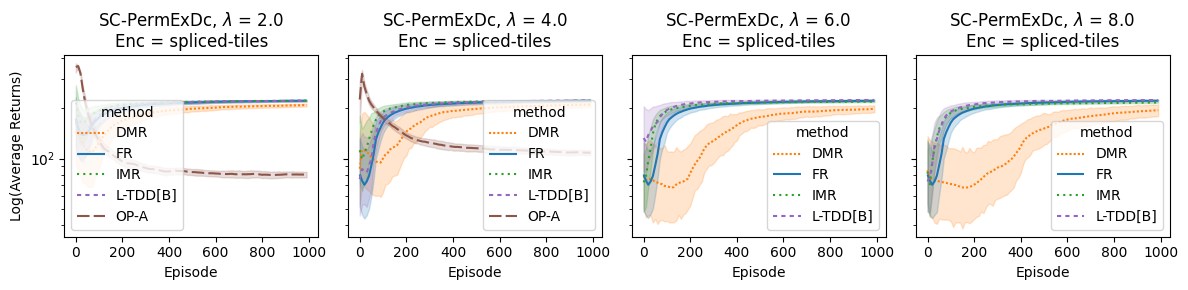

Plotted: 10.706093072891235s.


In [29]:
plot_eval_result(
    env="Finite-SC-PermExDc-v0",
    gamma=0.99,
    df_data=df_returns_curves,
    suffix="sarsa"
)

Proc: 0.020218849182128906s. Plotting...


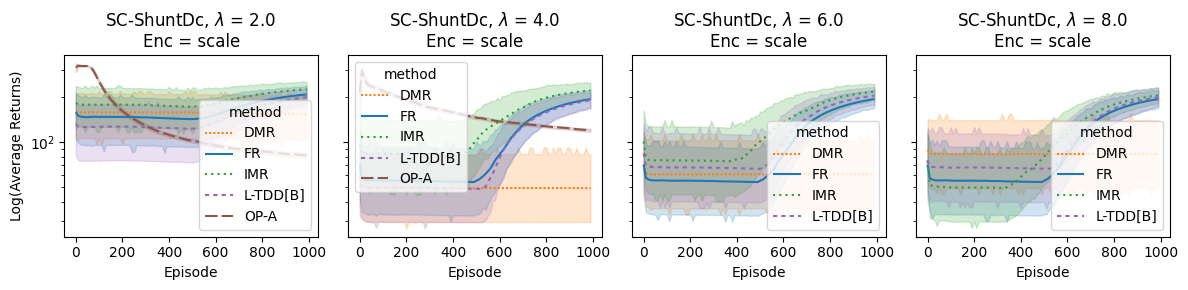

Plotted: 10.816304206848145s.


In [30]:
plot_eval_result(
    env="Finite-SC-ShuntDc-v0",
    gamma=1.0,
    df_data=df_returns_curves,
    suffix="sarsa"
)

Proc: 0.020869731903076172s. Plotting...


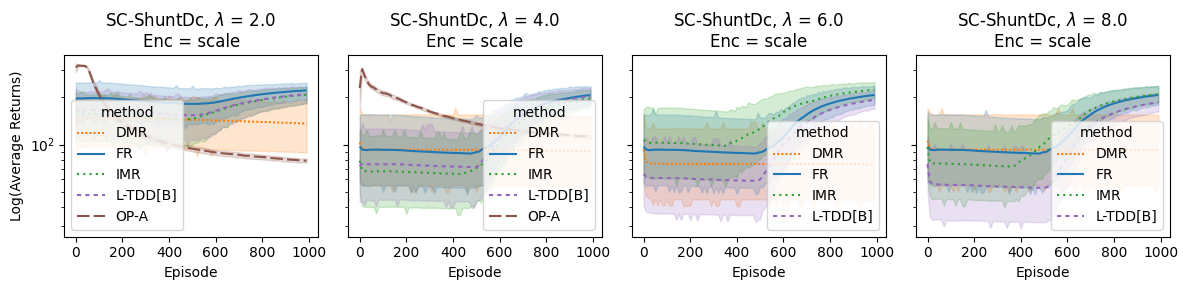

Plotted: 10.683471202850342s.


In [31]:
plot_eval_result(
    env="Finite-SC-ShuntDc-v0",
    gamma=0.99,
    df_data=df_returns_curves,
    suffix="sarsa"
)

Proc: 0.019942045211791992s. Plotting...


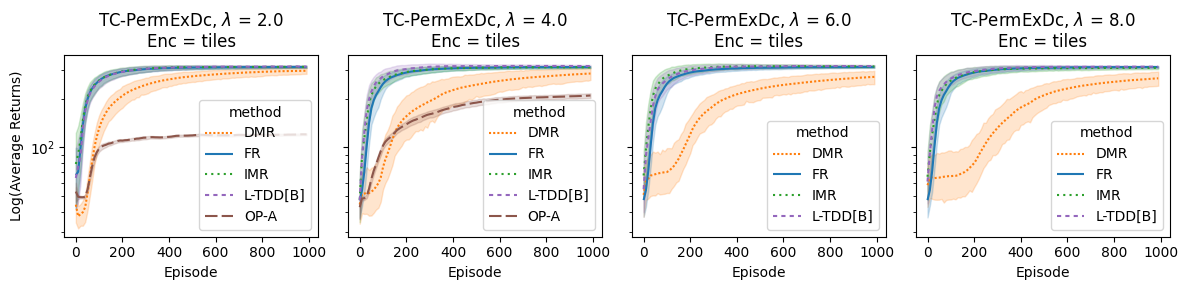

Plotted: 10.653825998306274s.


In [32]:
plot_eval_result(
    env="Finite-TC-PermExDc-v0",
    gamma=1.0,
    df_data=df_returns_curves,
    suffix="sarsa"
)

Proc: 0.012542963027954102s. Plotting...


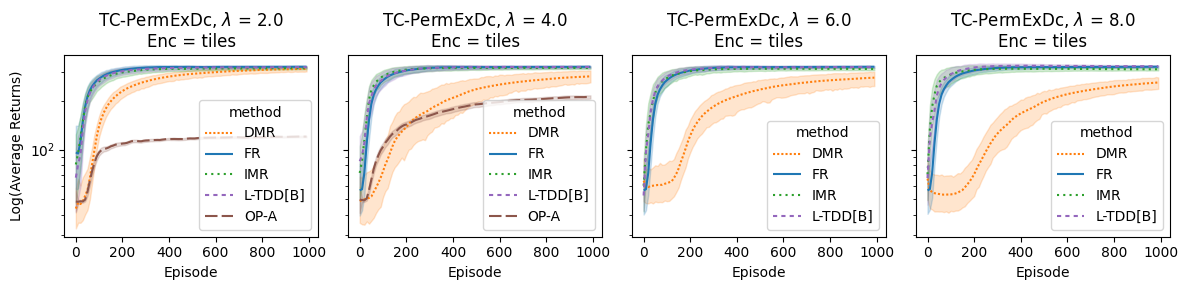

Plotted: 10.913362979888916s.


In [33]:
plot_eval_result(
    env="Finite-TC-PermExDc-v0",
    gamma=0.99,
    df_data=df_returns_curves,
    suffix="sarsa"
)

Proc: 0.016175031661987305s. Plotting...


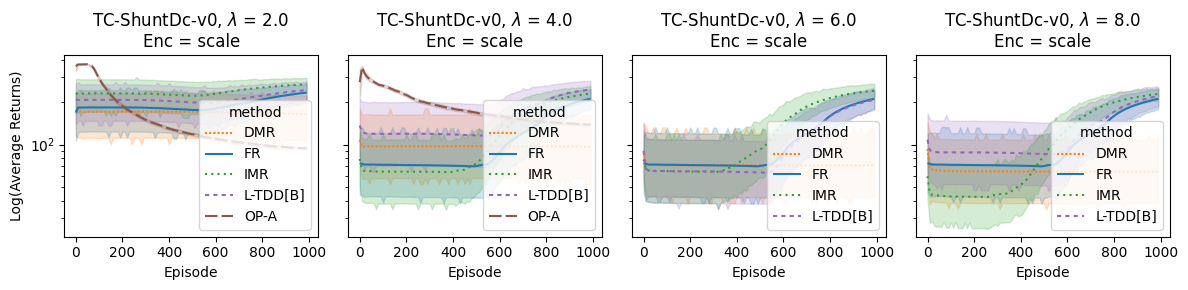

Plotted: 10.389846086502075s.


In [34]:
plot_eval_result(
    env="Finite-TC-ShuntDc-v0",
    gamma=1.0,
    df_data=df_returns_curves,
    suffix="sarsa"
)

Proc: 0.013175725936889648s. Plotting...


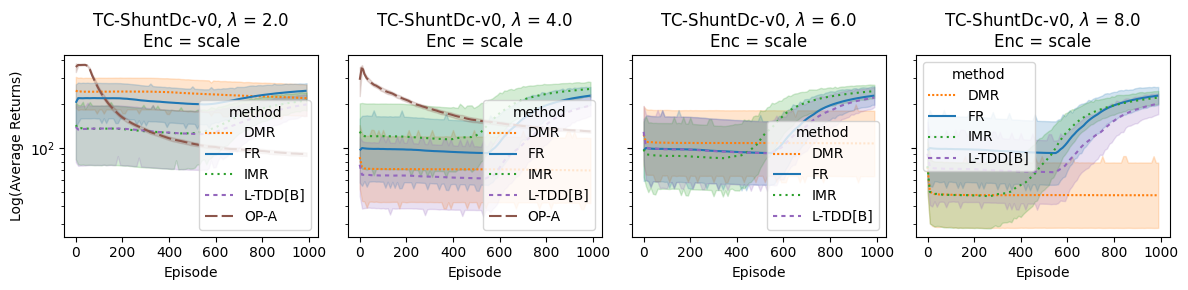

Plotted: 10.426107168197632s.


In [35]:
plot_eval_result(
    env="Finite-TC-ShuntDc-v0",
    gamma=0.99,
    df_data=df_returns_curves,
    suffix="sarsa"
)